<a href="https://colab.research.google.com/github/zakia16/Machine-Learning-Projects/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv("heart UCI.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

Saving heart.csv to heart.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Step 1 : Basic Statistics

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Step 2: Checking for Missing Values

In [ ]:
# Check for missing values in each column
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#Step 3. Exploratory Data Analysis (EDA)

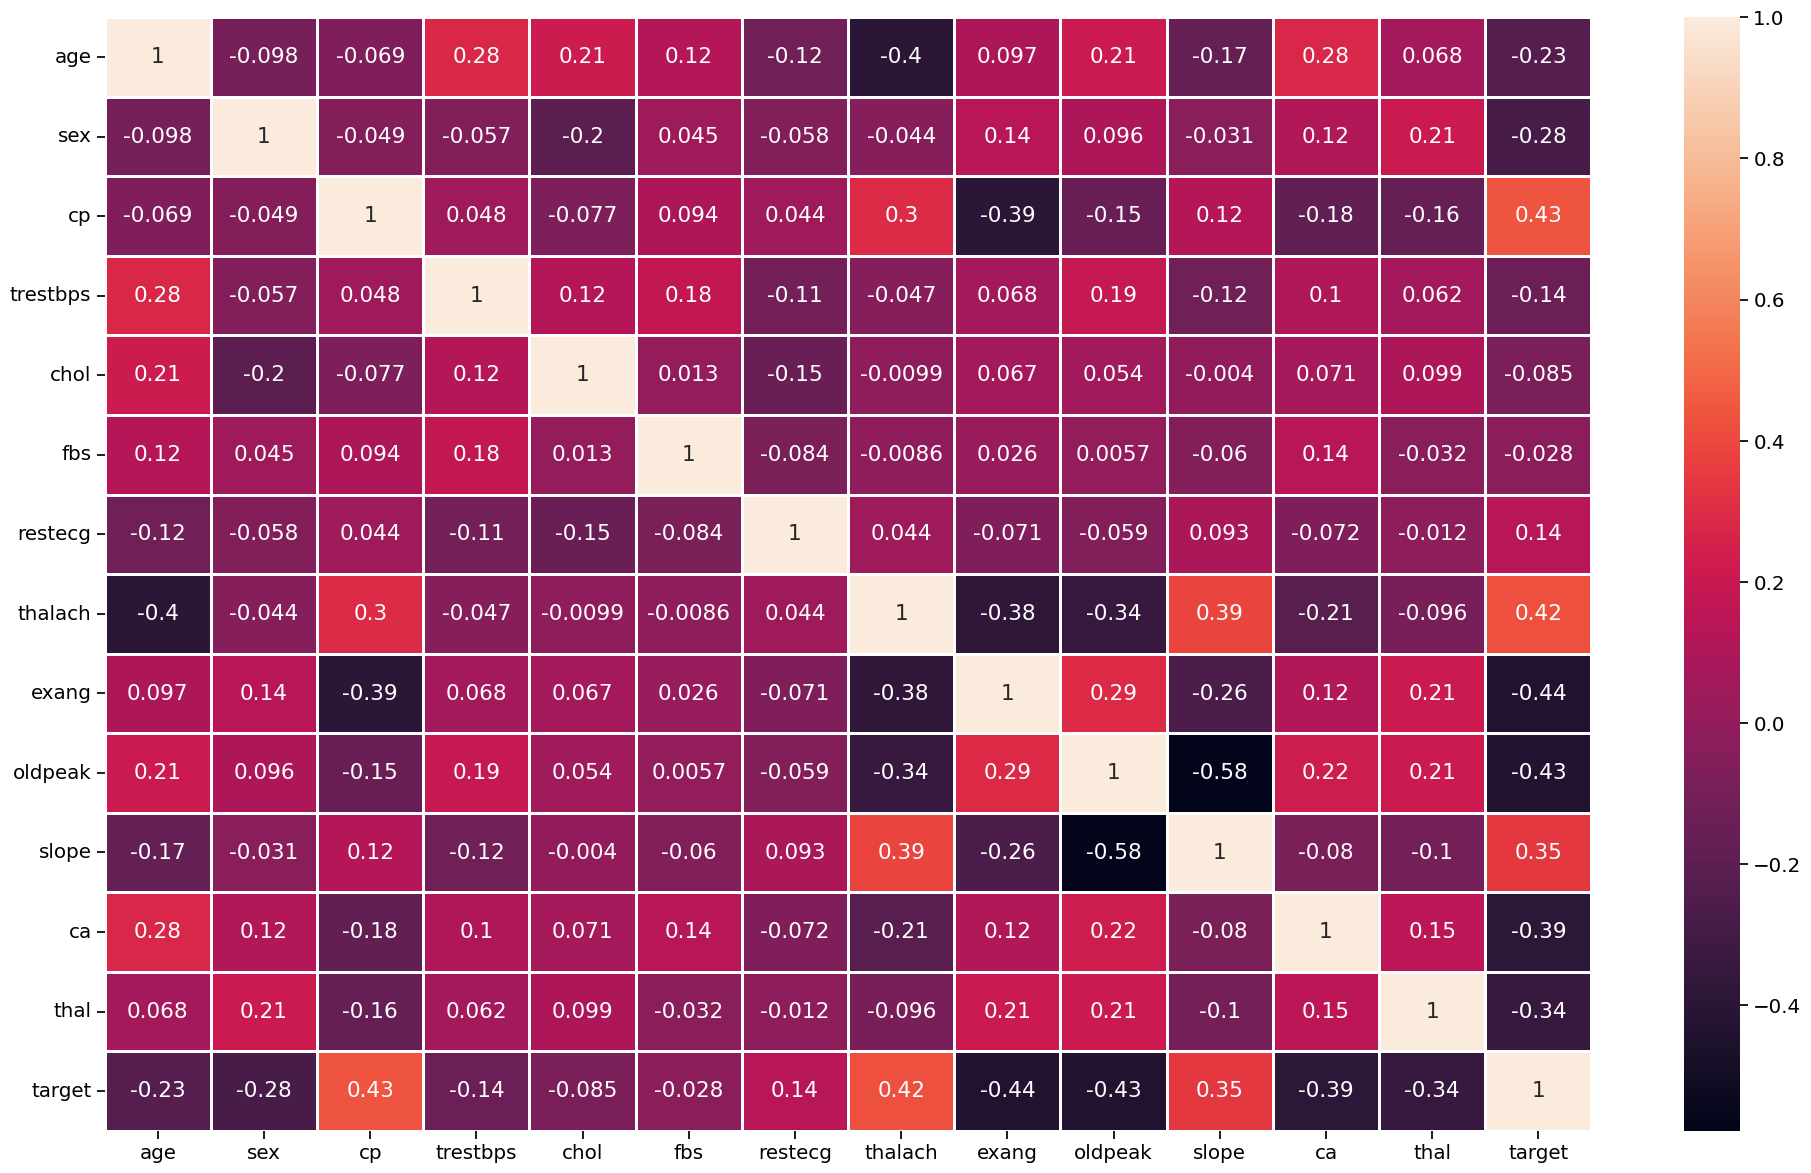

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

Some features have a correlation close to zero with the target, indicating a weak linear relationship.    
There are no pairs of features that are extremely highly correlated, so multicollinearity doesn't seem to be a significant concern.


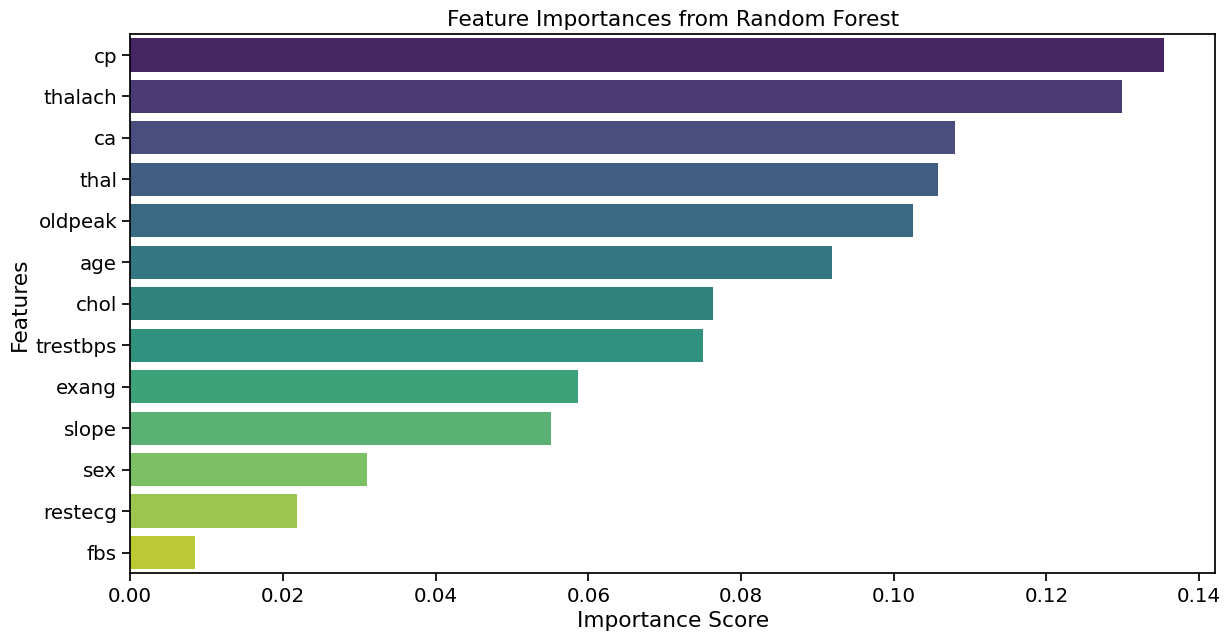

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Splitting data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Initialize a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a dataframe for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(14, 7))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


Considering the insights from both the correlation heatmap and the feature importance from Random Forest:

We don't observe extremely high correlations between any pair of features, so there's no immediate need to drop features based on multicollinearity.   
All features seem to contribute some information for the prediction, though features like fbs and restecg have a relatively lower importance.

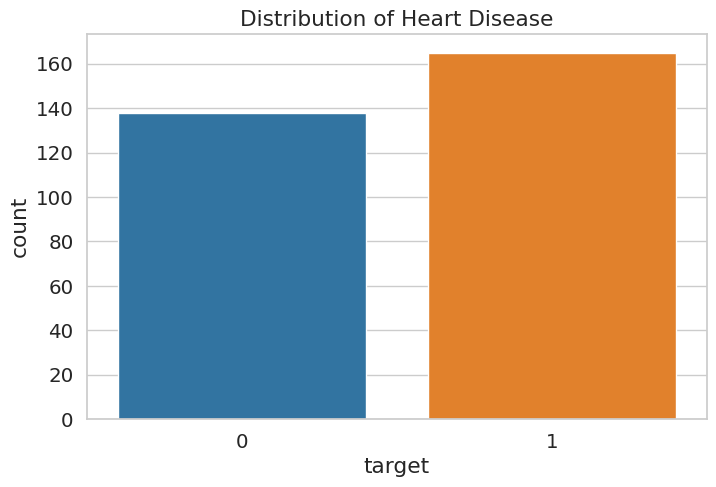

In [ ]:
import seaborn as sns

# Setting the style
sns.set_style("whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease')
plt.show()

**Inference:** The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

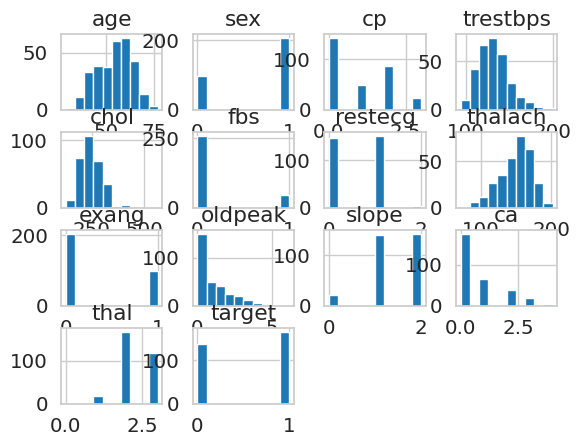

In [ ]:
data.hist()

distribution of some key features (Non Categorical)

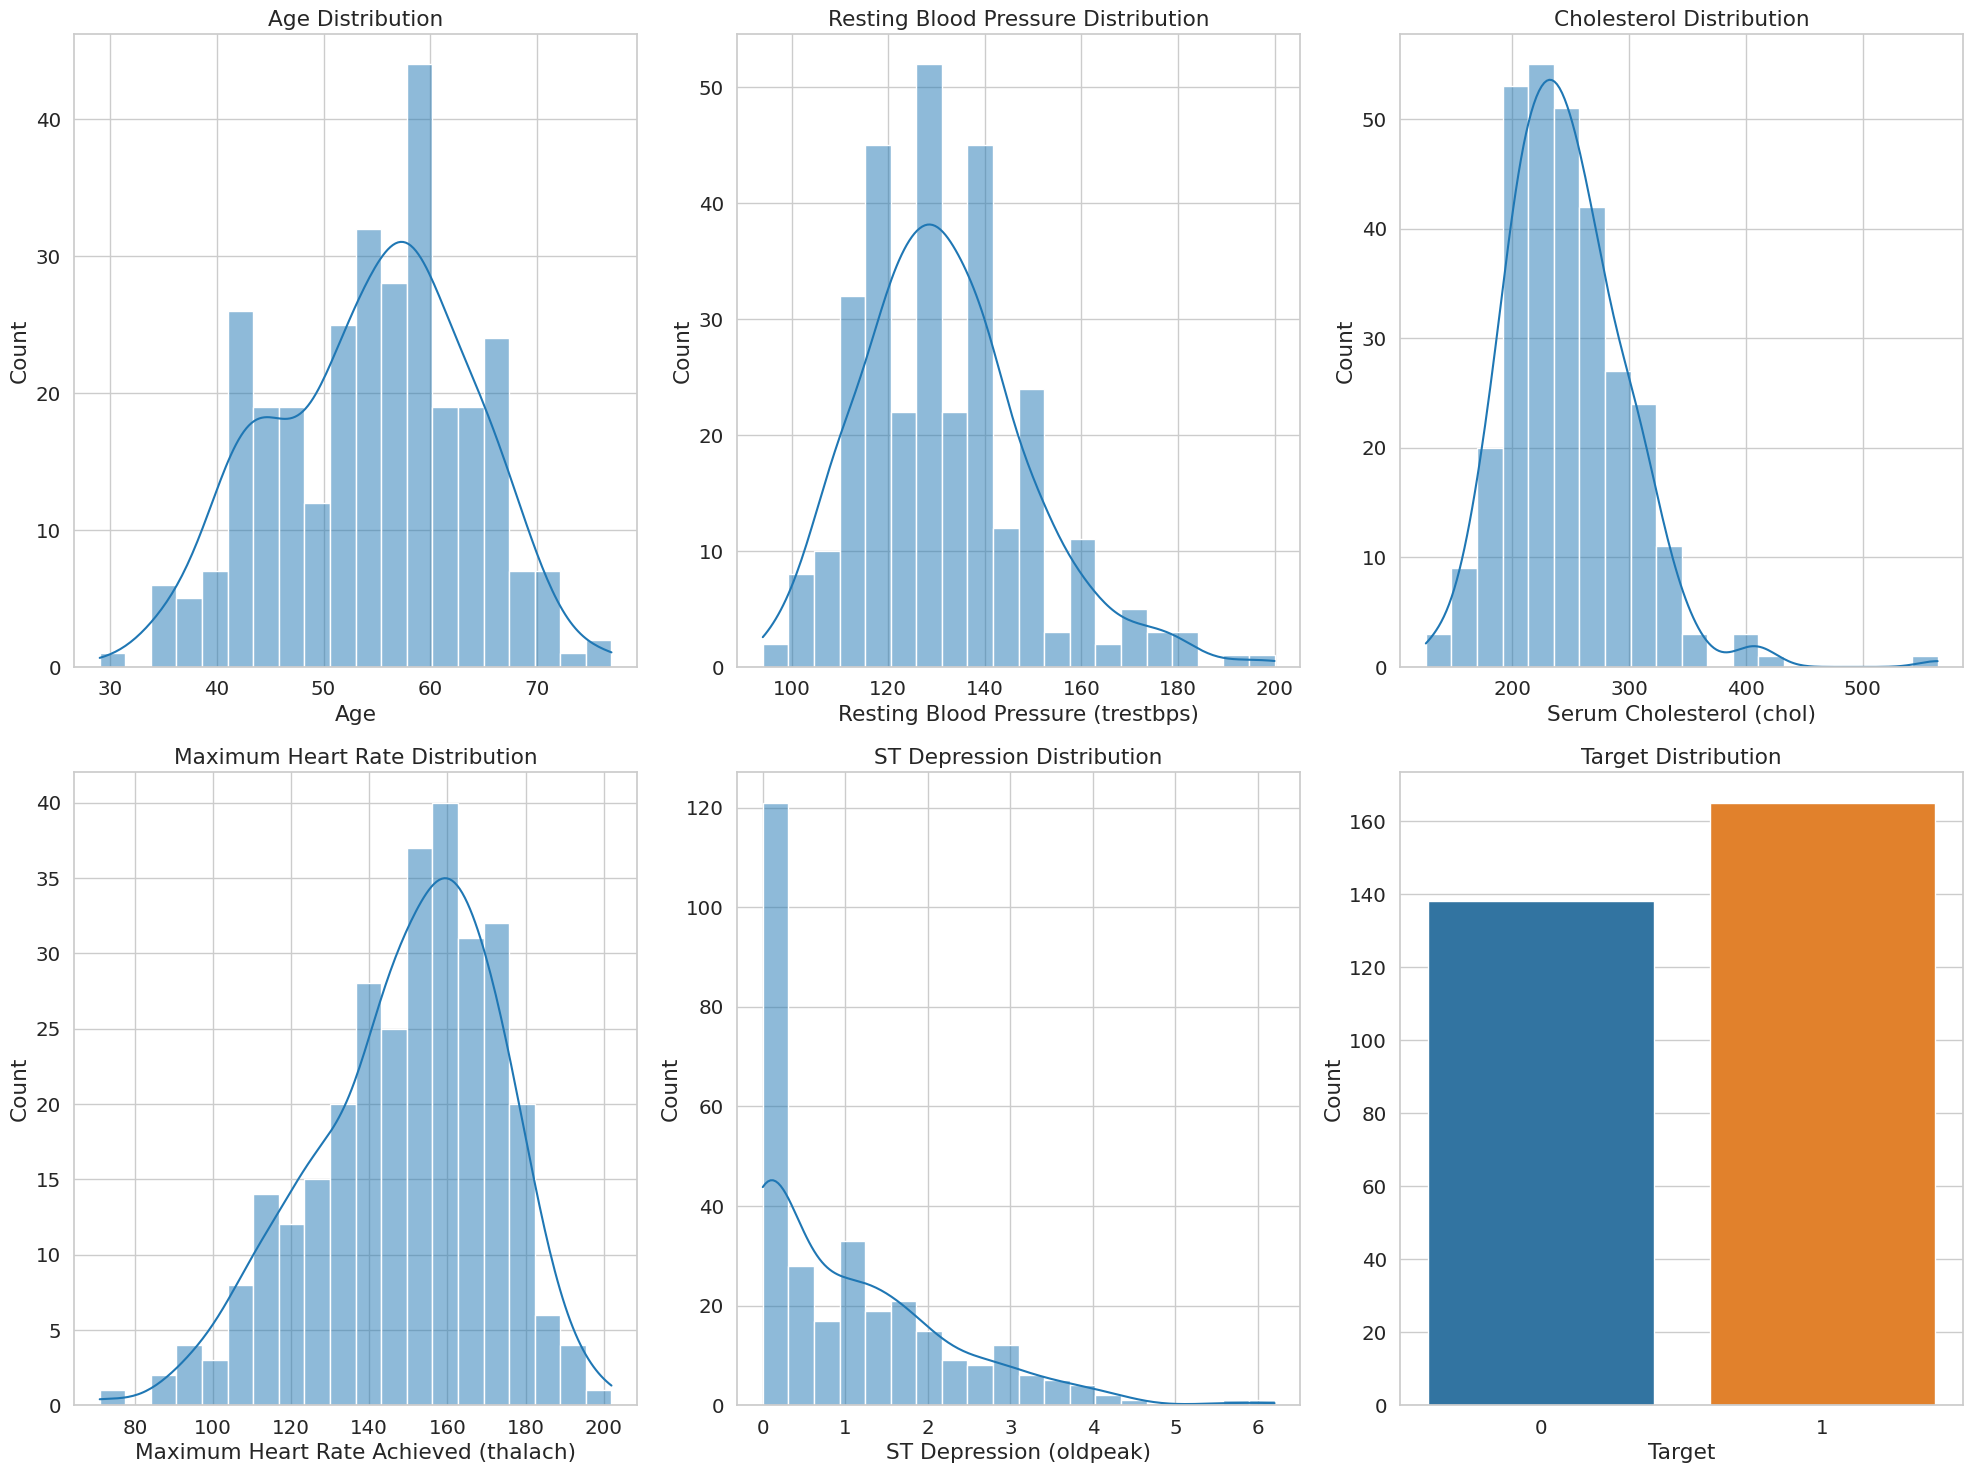

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(20, 15))

# Age distribution
plt.subplot(2, 3, 1)
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Resting Blood Pressure distribution
plt.subplot(2, 3, 2)
sns.histplot(data['trestbps'], bins=20, kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Count')

# Cholesterol distribution
plt.subplot(2, 3, 3)
sns.histplot(data['chol'], bins=20, kde=True)
plt.title('Cholesterol Distribution')
plt.xlabel('Serum Cholesterol (chol)')
plt.ylabel('Count')

# Maximum Heart Rate distribution
plt.subplot(2, 3, 4)
sns.histplot(data['thalach'], bins=20, kde=True)
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Maximum Heart Rate Achieved (thalach)')
plt.ylabel('Count')

# ST depression distribution
plt.subplot(2, 3, 5)
sns.histplot(data['oldpeak'], bins=20, kde=True)
plt.title('ST Depression Distribution')
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Count')

# Target distribution
plt.subplot(2, 3, 6)
sns.countplot(x='target', data=data)
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Resting Blood Pressure Distribution:** Resting blood pressure (trestbps) distribution is approximately normal with a peak around 130 mm Hg.
**Cholesterol Distribution**: The serum cholesterol (chol) distribution is slightly right-skewed, with most values between 200 and 300 mg/dl.
**Maximum Heart Rate Distribution:** The maximum heart rate (thalach) distribution is somewhat left-skewed, with a peak a little above 150.   
**ST Depression Distribution:** The ST depression (oldpeak) distribution is heavily right-skewed, indicating most participants have low ST depression values.

distribution of some key features (Categorical Variables)

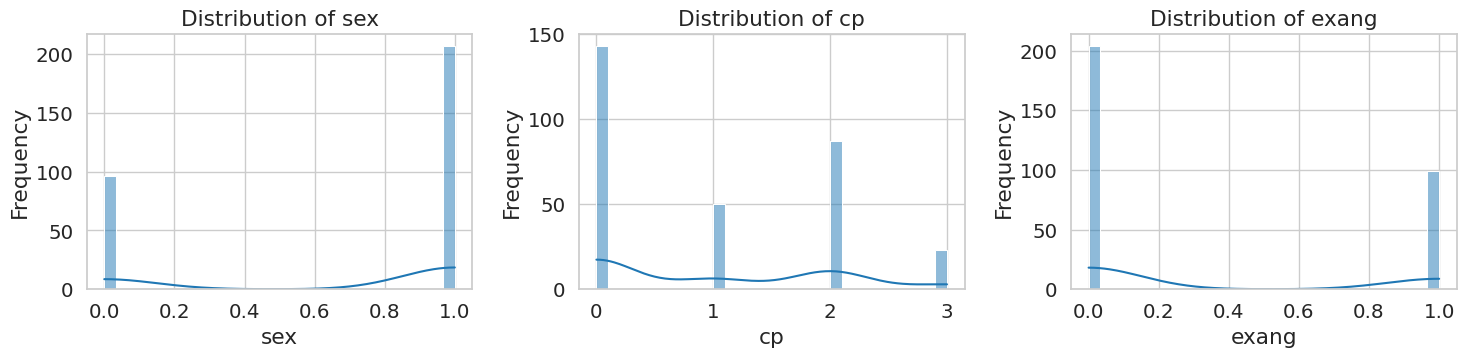

In [ ]:
import matplotlib.pyplot as plt
# Selecting some key features to visualize
key_features = ['sex', 'cp','exang']

# Plotting the distributions of the key features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Sex:** There are more male patients (represented by 1) than female patients.                     
**Chest Pain Type (cp):** The majority of patients have a chest pain type of 0, followed by type 2. Types 1 and 3 are less common.                   
**Exercise Induced Angina (exang):** The majority of patients do not experience exercise-induced angina.

#Step 4. Feature Engineering

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Convert Categorical Variables through one hot encoding
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


#Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((242, 30), (61, 30))

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.8852459016393442,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.90      0.88        29\n           1       0.90      0.88      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.88      0.89      0.89        61\nweighted avg       0.89      0.89      0.89        61\n')

**The Logistic Regression model** performed quite well on the test data with an accuracy of approximately 88.52%.

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.819672131147541,
 '              precision    recall  f1-score   support\n\n           0       0.78      0.86      0.82        29\n           1       0.86      0.78      0.82        32\n\n    accuracy                           0.82        61\n   macro avg       0.82      0.82      0.82        61\nweighted avg       0.82      0.82      0.82        61\n')

In [ ]:
#Random Forests

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.8688524590163934,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.86      0.86        29\n           1       0.88      0.88      0.88        32\n\n    accuracy                           0.87        61\n   macro avg       0.87      0.87      0.87        61\nweighted avg       0.87      0.87      0.87        61\n')

In [ ]:
#Support Vector Machines (SVM)
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.7049180327868853,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.52      0.62        29\n           1       0.67      0.88      0.76        32\n\n    accuracy                           0.70        61\n   macro avg       0.73      0.70      0.69        61\nweighted avg       0.73      0.70      0.69        61\n')

In [ ]:
#Gradient Boosted Trees (XGBoost)
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.8524590163934426,
 '              precision    recall  f1-score   support\n\n           0       0.81      0.90      0.85        29\n           1       0.90      0.81      0.85        32\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.86      0.85      0.85        61\n')

 'Logistic Regression': 0.8852459016393442,       
 'Random Forest': 0.8660655737704918,       
 'XGBoost': 0.859672131147541     
 'Decision Trees': 0.8140983606557377,     
 'SVM': 0.7049180327868853,
 'KNN' : Not applied (feature needs to be scaled bevore applying)

#Perform Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=10000, random_state=42)

# Apply 5-fold cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')

# Calculate average accuracy and standard deviation from the cross-validation scores
avg_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

avg_accuracy, std_accuracy

(0.8344387755102041, 0.06373558841203353)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Define the models
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network (MLP)": MLPClassifier(max_iter=10000, random_state=42)
}

# Evaluate the models using cross-validation
results = {}
for name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    results[name] = cv_score

results


{'KNN': 0.6446428571428571,
 'SVM': 0.6073129251700681,
 'Decision Tree': 0.7273809523809524,
 'Random Forest': 0.8017006802721088,
 'Gradient Boosting': 0.8097789115646258,
 'Neural Network (MLP)': 0.7728741496598639}

In [ ]:
# scale features before applying KNN
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [ ]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


Perform Cross Validation

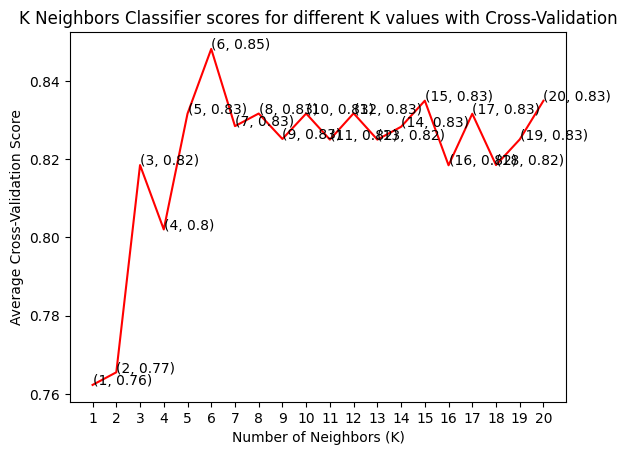

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Your data preparation steps here
y = data['target']
X = data.drop(['target'], axis=1)

knn_scores = []
k_values = list(range(1,21))

# Using 5-fold cross-validation as an example
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X, y, cv=5)
    knn_scores.append(scores.mean())

# Plotting the cross-validation scores
plt.plot(k_values, knn_scores, color='red')
for i in k_values:
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1], 2)))
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Cross-Validation Score')
plt.title('K Neighbors Classifier scores for different K values with Cross-Validation')
plt.show()


**Logistic Regression** performed well with accuracy 83%.     
However, if we do feature scaling and apply **KNN** accuracy will be 85%.


**** **fbs** showed less important feature, but if we drop it, logistic regression gives same accuracy and for KNN it reduced to 84%